# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Logistica: Lección 6 - Randon Forest**
--

In [1]:
# Tratamiento de los datos
# ========================
import pandas as pd
import numpy as np
from tqdm import tqdm

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# =====================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Random Forest en este tipo de problemas. Los objetivos de este pair programming:


Ajustad un modelo de Random Forest a nuestros datos.

- Calculad las métricas a nuestro nuevo modelo.
  
- Comparad las métricas con los modelos hechos hasta ahora. ¿Cuál es mejor?

In [2]:
# abrimos el dataset
df = pd.read_pickle("datos/invistico_airline_encoding.pkl")

In [3]:
# separamos los datos en variable respuesta (y) y predictoras (X)
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [4]:
# separamos en train y test
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

Como esta basado en el Decision Tree, usaremos los hiperparámetros que seleccionamos en la lección anterior 

In [5]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 
param = {"max_depth": [4, 6, 10, 12, 14], #ponemos los valores usados en el decision tree
        "max_features": [2,3,4,5],# Ponemos como límite el 5 ya que es el resultado de la raiz cuadrada era 4,58. Igual que en el decision tree
        "min_samples_split": [ 100, 1000, 30000], # subimos la muestra
        "min_samples_leaf": [ 100, 1000, 30000]} # subimos la muestra

In [6]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation
            verbose=-1) # para que no printee ningún mensaje en pantalla
        

In [7]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 10, 12, 14],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [100, 1000, 30000],
                         'min_samples_split': [100, 1000, 30000]},
             verbose=-1)

In [8]:
# sacamos el mejor bosque
bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=14, max_features=5, min_samples_leaf=100,
                       min_samples_split=100, random_state=42)

El mejor modelo es el que tiene los siguientes parámetros:
- max_depth = 14
- max_features = 5
- min_samples_split = 100
- min_samples_leaf = 100

In [ ]:
# dibujamos los árboles del bosque
for arbol in tqdm(bosque.estimators_):
  fig = plt.figure(figsize=(20, 10))
  tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
  plt.show()

In [9]:
# hacemos las predicciones sobre los dos set de datos el x_test y el x_train
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [10]:
# sacamos las métricas para ver si hay overfitting o unerfitting y si el modelo es suficientemente bueno
df_RF_results = spf.metricas_rlog(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
df_RF_results

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.930089,0.935169,0.938046,0.936605,0.858686,test,Random Forest
1,0.929955,0.934998,0.936974,0.935985,0.858655,train,Random Forest


In [11]:
# cargamos el csv con los resultados del algoritmo de regresión logística y decision tree para comparar todos los modelos
df_DT_results = pd.read_csv("datos/resultados_satisfaction_DT.csv", index_col= 0)
df_DT_results

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
1,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
2,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decision tree II
3,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decision tree II
6,0.927496,0.941035,0.910475,0.925503,0.854925,test,Decision tree Balanceado II
7,0.939704,0.954024,0.924272,0.938912,0.879418,train,Decision tree Balanceado II


In [12]:
# añadimos los resultados del random forest
df_results_final = pd.concat([df_DT_results, df_RF_results], axis = 0).reset_index(drop=True)
df_results_final

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
1,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
2,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decision tree II
3,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decision tree II
4,0.927496,0.941035,0.910475,0.925503,0.854925,test,Decision tree Balanceado II
5,0.939704,0.954024,0.924272,0.938912,0.879418,train,Decision tree Balanceado II
6,0.930089,0.935169,0.938046,0.936605,0.858686,test,Random Forest
7,0.929955,0.934998,0.936974,0.935985,0.858655,train,Random Forest


In [13]:
# usamos colores para facilitar la comparación 
df_results_final.style.background_gradient(cmap='seismic')

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
1,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
2,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decision tree II
3,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decision tree II
4,0.927496,0.941035,0.910475,0.925503,0.854925,test,Decision tree Balanceado II
5,0.939704,0.954024,0.924272,0.938912,0.879418,train,Decision tree Balanceado II
6,0.930089,0.935169,0.938046,0.936605,0.858686,test,Random Forest
7,0.929955,0.934998,0.936974,0.935985,0.858655,train,Random Forest


CONCLUSIONES:

- Aunque los modelos de Random Forest suelen presentar mejores métricas en general, en nuestro caso, los datos sugieren que el modelo `Decision Tree II` presenta mejores métricas por tener la precision más alta. Aunque los kappa de `Decision tree Balanceado II` y de `Random Forest` sean un poco más altos, las diferencia es despreciable. 

In [14]:
# guardar este dataframe en un csv para guardar todos los resultados juntos
df_results_final.to_csv("datos/resultados_satisfaction_RF.csv")


In [15]:
# crearnos un dataframe con la importancia de las predictoras
importancia_predictoras = pd.DataFrame({'variable predictora': x_train.columns,
                                            'importancia': bosque.feature_importances_})
# ordenamos de mayor a menor los resultados
importancia_predictoras.sort_values(by=["importancia"], ascending=False, inplace = True)
# printeamos los resultados
print("Importancia de las variables predictoras en el modelo")
print("-------------------------------------------")
importancia_predictoras

Importancia de las variables predictoras en el modelo
-------------------------------------------


,variable predictora,importancia
9,inflight_entertainment,0.218525
4,seat_comfort,0.193486
11,ease_of_online_booking,0.159829
1,customer_type,0.073518
17,online_boarding,0.043395
3,class,0.038418
6,food_and_drink,0.036972
2,type_of_travel,0.036017
0,gender,0.034744
10,online_support,0.033628


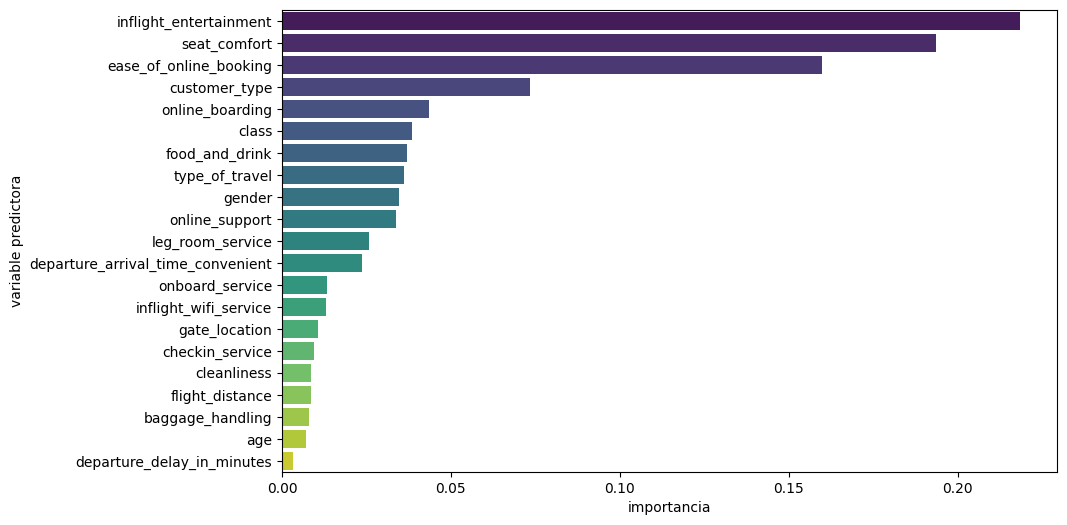

In [16]:
# por último ploteamos los resultados para verlo de una forma más amigable. 
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "variable predictora", data = importancia_predictoras, palette="viridis");
plt.show()